# CNN

In [32]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from keras.datasets.mnist import load_data
from tensorflow.keras.utils import set_random_seed, plot_model
from keras import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from sklearn.model_selection import train_test_split 

In [33]:
set_random_seed(42)

## [1] 데이터 불러오기

In [34]:
(X_train_base, y_train_base), (X_test_base, y_test) = load_data()

In [35]:
def scaled_reshape(data):
    data_scaled = data/255.0
    data_reshape = data_scaled.reshape(-1, 28, 28, 1)
    return data_reshape

In [36]:
X_train_base = scaled_reshape(X_train_base)
X_test = scaled_reshape(X_test_base)

In [37]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train_base, y_train_base
)

## [2] 데이터셋에 노이즈 주기

In [38]:
# np.random.normal : 평균= 0, 표준편차= 1, 출력= size
X_train_noised = X_train + np.random.normal(0, 0.5, size=X_train.shape)
X_test_noised = X_test + np.random.normal(0, 0.5, size=X_test.shape)
X_val_noised = X_val + np.random.normal(0, 0.5, size=X_val.shape)

# 픽셀범위 0.0 ~ 1.0 벗어나는 픽셀값 조절 np.clip(array, min, max)
X_train_noised = np.clip(X_train_noised, a_min=0, a_max=1)
X_test_noised = np.clip(X_test_noised, a_min=0, a_max=1)
X_vsl_noised = np.clip(X_val_noised, a_min=0, a_max=1)

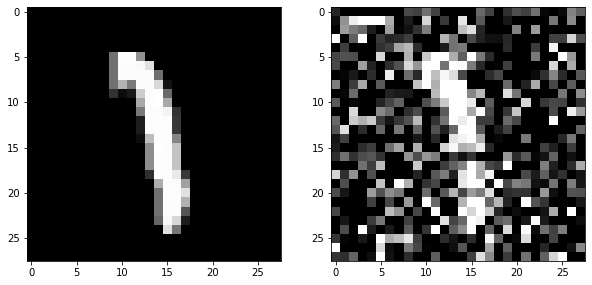

In [39]:
plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
plt.imshow(X_train[12].reshape(28, 28), cmap="gray")

plt.subplot(1,2,2)
plt.imshow(X_train_noised[12].reshape(28, 28), cmap="gray")
plt.show()

## 모델 생성 및 학습

In [40]:
def make_cnn_model(filters:int):
    model = Sequential()
    # 입력
    model.add(Conv2D(
        filters=filters,
        kernel_size=3,
        padding="same",
        activation="relu",
        input_shape=(28, 28, 1)
        )
    )
    # 출력
    model.add(Dense(784, activation="sigmoid"))
    model.compile(
        loss="mse",
        optimizer="adam"
    )
    return model

In [41]:
model_cnn = make_cnn_model(100)

In [42]:
model_cnn.fit(
    X_train_noised,
    X_train,
    epochs=1,
    verbose=False
)

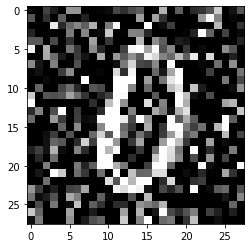

In [43]:
plt.imshow(X_train_noised[0].reshape(28,28), cmap="gray")